<a href="https://colab.research.google.com/github/H3nr1que26/Pedro/blob/main/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [675]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics

import math
from math import sqrt, pi, exp
from scipy.stats import norm 




In [676]:
def color_corr ( value_str ):
  try:
    value = float(value_str)
    if value >= 0.6 or value <= -0.6:
      color = 'red'
    else:
      color = 'black'
  except:
          color = 'black'
  return 'color: %s' % color

In [677]:
df=pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [678]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [679]:
pd.isna(df).sum().to_frame("Valor Vazio")

,Valor Vazio
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [680]:
sex = df["sex"].drop_duplicates()
sex

0    female
1      male
Name: sex, dtype: object

In [681]:
smoker = df["smoker"].drop_duplicates()
smoker

0    yes
1     no
Name: smoker, dtype: object

In [682]:
regiao= df["region"].drop_duplicates()
regiao

0    southwest
1    southeast
3    northwest
8    northeast
Name: region, dtype: object

In [683]:
df = pd.get_dummies(df,columns=['region'])

df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0,0,1,0
3,33,male,22.705,0,no,21984.47061,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0,1,0,0


In [684]:
df['sex'].replace( {'female':1, 'male':0}, inplace=True)

df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,yes,16884.92400,0,0,0,1
1,18,0,33.770,1,no,1725.55230,0,0,1,0
2,28,0,33.000,3,no,4449.46200,0,0,1,0
3,33,0,22.705,0,no,21984.47061,0,1,0,0
4,32,0,28.880,0,no,3866.85520,0,1,0,0


In [685]:
df['smoker'].replace( {'yes':1, 'no':0}, inplace=True)

df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [686]:
df.corr().style.applymap(color_corr)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292,0.002425,0.011156,-0.017117,0.004184
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,-0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


In [687]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [688]:
alvo = 'charges'

In [689]:
X = df.drop( columns = [alvo], axis = 1 )
X

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0,0,0,1
1,18,0,33.770,1,0,0,0,1,0
2,28,0,33.000,3,0,0,0,1,0
3,33,0,22.705,0,0,0,1,0,0
4,32,0,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,1,0,0
1334,18,1,31.920,0,0,1,0,0,0
1335,18,1,36.850,0,0,0,0,1,0
1336,21,1,25.800,0,0,0,0,0,1


In [690]:
y = df[alvo]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [691]:
X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size = 0.5, random_state = 0)

In [692]:
y_train

515     11362.7550
285      7742.1098
1129     1728.8970
71       6799.4580
561     10923.9332
           ...    
763      3070.8087
835      7160.3303
1216     5415.6612
559      1646.4297
684      4766.0220
Name: charges, Length: 669, dtype: float64

In [693]:
X_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
515,58,0,35.70,0,0,0,0,0,1
285,46,0,26.62,1,0,0,0,1,0
1129,19,1,18.60,0,0,0,0,0,1
71,31,0,28.50,5,0,1,0,0,0
561,54,1,32.68,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
763,27,0,26.03,0,0,1,0,0,0
835,42,0,35.97,2,0,0,0,1,0
1216,40,0,25.08,0,0,0,0,1,0
559,19,0,35.53,0,0,0,1,0,0


In [694]:
X_test.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
578,52,0,30.200,1,0,0,0,0,1
610,47,1,29.370,1,0,0,0,1,0
569,48,0,40.565,2,1,0,1,0,0
1034,61,0,38.380,0,0,0,1,0,0
198,51,1,18.050,0,0,0,1,0,0


In [695]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669 entries, 578 to 874
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               669 non-null    int64  
 1   sex               669 non-null    int64  
 2   bmi               669 non-null    float64
 3   children          669 non-null    int64  
 4   smoker            669 non-null    int64  
 5   region_northeast  669 non-null    uint8  
 6   region_northwest  669 non-null    uint8  
 7   region_southeast  669 non-null    uint8  
 8   region_southwest  669 non-null    uint8  
dtypes: float64(1), int64(4), uint8(4)
memory usage: 34.0 KB


In [696]:
LR = LinearRegression().fit(X_train, y_train)

In [697]:
print("Acc Treino:", LR.score(X_train, y_train))
print("Acc Teste:", LR.score(X_test, y_test))

Acc Treino: 0.7333787536289706
Acc Teste: 0.7668341029836723


In [698]:
y_predito = LR.predict(X_test)
y_predito

array([10846.83642142,  9682.05895934, 38162.29067531, 16233.80938946,
        6625.5501011 ,  3541.78395921,  1567.81935946, 14900.09833066,
        9344.71439221,  7553.78757657,  4620.94119312, 10416.81942105,
        8757.95238777,  3734.32881205, 27346.91300791, 11091.74448266,
       10879.58202691,  6073.98557932,  8142.9877798 , 26715.91737056,
       33208.16868412, 14703.53163618, 11893.92422887, 31950.50869619,
        4043.91550553,  9361.53825628,   845.39392893, 10296.39036065,
        3742.81214613, 10376.36526412,  9303.59063764, 40064.6082784 ,
       15467.09705026, 13645.35153539, 24365.16900228,  5214.3536532 ,
       12844.62238207, 30342.37856792, 33612.06665479,  3582.80670477,
        3816.19263389,  3715.01998179, 30011.79586024, 39403.73054396,
       27824.82230732,  5362.69440505, 10972.06294089,  7553.53763647,
        3585.42210233, 10277.94384506,  5944.00100623,  3671.52527721,
       32397.30612552, 38871.9406493 , 16494.05287709,  7110.53294077,
      

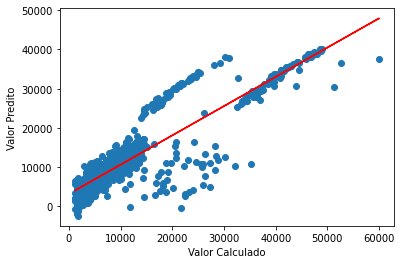

In [699]:
plt.scatter(y_test, y_predito)
plt.xlabel('Valor Calculado')
plt.ylabel('Valor Predito')
z = np.polyfit(y_test, y_predito, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "r-")
plt.show();

In [700]:
print('MAE.:', metrics.mean_absolute_error(y_test, y_predito) )
print('MSE.:', metrics.mean_squared_error(y_test, y_predito))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predito)))

MAE.: 4105.582381145646
MSE.: 34453513.05184617
RMSE: 5869.711496474607
